In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import sklearn.metrics as skm
import sklearn.cluster as skc
import sklearn.preprocessing as skp
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the csv
cancer_data_url='https://drive.google.com/uc?export=download&id=12B0zuk8Vv6cttQ7tdRVecZQRiPzc1KiU'
cancer_df = pd.read_csv(cancer_data_url)
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
cancer_df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
cancer_id = cancer_df["id"]

In [5]:
#saving diagnosis data
cancer_diagnosis = cancer_df["diagnosis"]
cancer_diagnosis

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [6]:
#remove unwanted columns - removing the worst and se columns
cancer_df = cancer_df.iloc[:,2:12]
cancer_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [7]:
cancer_df_variables = cancer_df.columns

In [8]:
# Standardize (scale, recenter)
scaler = skp.StandardScaler()
cancer_standardized = scaler.fit_transform(cancer_df)
cancer_df_standardized = pd.DataFrame(cancer_standardized)
cancer_df_standardized.columns = [cancer_df[:0]]
cancer_df_standardized.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


In [9]:
# prompt: Generate principal components for table above

pca = PCA()
cancer_pca = pca.fit_transform(cancer_df_standardized)
cancer_df_pca = pd.DataFrame(cancer_pca)
pca_columns = ['PC' + str(i) for i in range(1, len(cancer_df_pca.columns) + 1)]
cancer_df_pca.columns = pca_columns
cancer_df_pca.head()
cancer_df_pca.shape

(569, 10)

In [10]:
# Loadings are the components_ attribute of the PCA object
loadings = pca.components_.T  # Transpose to align with our convention: rows are variables, columns are components
# Now, loadings[i, j] represents how much variable i contributes to component j
# To display the loadings matrix
loadings_df = pd.DataFrame(loadings,index = cancer_df_variables, columns = pca_columns)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
radius_mean,0.363938,-0.313929,-0.124428,0.029559,-0.031067,-0.264180,-0.044188,0.084834,-0.474425,-0.669071
texture_mean,0.154451,-0.147181,0.951057,0.008916,-0.219923,-0.032207,0.020557,-0.007127,-0.004213,0.000250
perimeter_mean,0.376044,-0.284658,-0.114084,0.013458,-0.005945,-0.237819,-0.083369,0.089259,-0.380167,0.740491
area_mean,0.364086,-0.304842,-0.123378,0.013443,-0.019341,-0.331707,0.261188,0.144610,0.747347,-0.032359
smoothness_mean,0.232481,0.401962,-0.166532,-0.107802,-0.843745,0.062225,0.011292,0.170503,-0.005847,0.003690
compactness_mean,0.364442,0.266013,0.058278,-0.185700,0.240183,0.005271,-0.803805,0.063980,0.218732,-0.052753
concavity_mean,0.395748,0.104286,0.041146,-0.166654,0.312533,0.601467,0.367136,0.449573,-0.081171,-0.010367
concave points_mean,0.418038,0.007184,-0.068554,-0.072984,-0.009180,0.265613,0.141313,-0.850919,0.022025,-0.003748
symmetry_mean,0.215238,0.368301,0.036724,0.892998,0.112888,-0.061957,0.047902,0.016456,-0.009068,0.001467
fractal_dimension_mean,0.071837,0.571768,0.113584,-0.349332,0.264878,-0.567919,0.345214,-0.065259,-0.129667,0.007057


In [11]:
# prompt: generate the explain variance for the table above

pca_variances = pca.explained_variance_ratio_
pca_variances = pd.DataFrame(pca_variances)
pca_variances.columns = ['Explained Variance']
pca_variances.index = pca_columns
print(pca_variances)

      Explained Variance
PC1             0.547859
PC2             0.251871
PC3             0.088062
PC4             0.049901
PC5             0.037254
PC6             0.012414
PC7             0.008009
PC8             0.003489
PC9             0.001114
PC10            0.000028


In [12]:
#Just checking if cumulatove variance is 1
pca_variances["cumulative Variance"] = pca_variances['Explained Variance'].cumsum()
print(pca_variances)

      Explained Variance  cumulative Variance
PC1             0.547859             0.547859
PC2             0.251871             0.799730
PC3             0.088062             0.887792
PC4             0.049901             0.937693
PC5             0.037254             0.974947
PC6             0.012414             0.987361
PC7             0.008009             0.995369
PC8             0.003489             0.998858
PC9             0.001114             0.999972
PC10            0.000028             1.000000


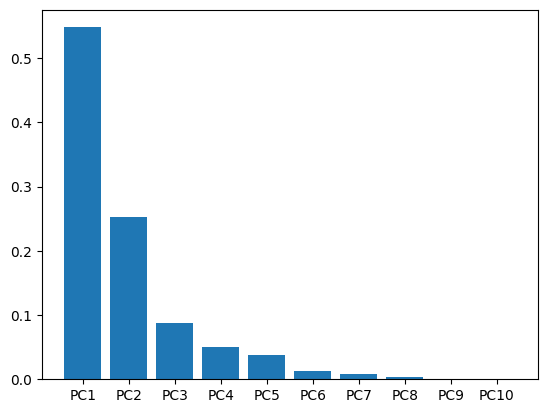

In [13]:
#Now plot a scree plot
plt.bar(x = range(1,pca_variances.index.size+1), height = pca_variances["Explained Variance"], tick_label = pca_columns)
plt.xlabel = "Principal Component"
plt.ylabel = "Percentage of Explained Variance"
plt.title = "Scree Plot"
plt.show()


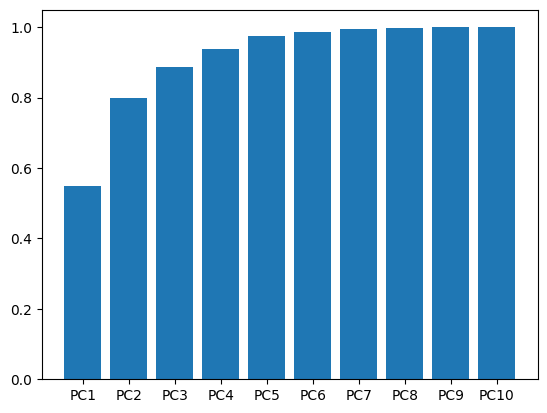

In [14]:
#Now lets plot for cumultaive variances
plt.bar(x = range(1,pca_variances.index.size+1), height = pca_variances["cumulative Variance"], tick_label = pca_columns)
plt.xlabel = "Principal Component"
plt.ylabel = "Percentage of cumulative Variance"
plt.title = "Cumulative Variance Plot"
plt.show()


In [15]:
#draw pca plot
pca_df = pd.DataFrame(cancer_pca,index = cancer_diagnosis,columns = pca_columns)
pca_df = pca_df.reset_index()

pca_df

,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,M,5.224155,3.204428,-2.171340,-0.169276,1.514252,0.113123,-0.344684,-0.231932,-0.021982,-0.011258
1,M,1.728094,-2.540839,-1.019679,0.547539,0.312330,-0.935634,0.420922,-0.008343,-0.056171,-0.022992
2,M,3.969757,-0.550075,-0.323569,0.397964,-0.322877,0.271493,0.076506,-0.355050,0.020116,-0.022675
3,M,3.596713,6.905070,0.792832,-0.604828,0.243176,-0.616970,-0.068051,-0.100163,-0.043481,-0.053456
4,M,3.151092,-1.358072,-1.862234,-0.185251,0.311342,0.090778,0.308087,0.099057,-0.026574,0.034113
...,...,...,...,...,...,...,...,...,...,...,...
564,M,4.436781,-2.020670,-0.457737,-0.472738,-0.802882,0.553317,0.904138,-0.155407,0.022121,-0.005704
565,M,2.874757,-2.395235,1.169465,0.073879,-0.745189,-0.100192,0.355690,-0.158585,-0.037307,-0.017740
566,M,0.649583,-2.041783,1.710966,-0.271559,-0.101971,-0.040732,-0.188382,0.018907,-0.047129,0.000593
567,M,6.905664,1.216243,1.640120,0.153472,0.405966,0.468304,-0.309367,0.223487,0.004156,-0.018134


In [16]:
fig = px.scatter(pca_df, x="PC1", y="PC2", color="diagnosis",
                 title="")
fig.show()

In [17]:
fig = px.scatter_3d(pca_df, x="PC1", y="PC2", z="PC3", color='diagnosis', title='3D Scatter Plot ')
fig.show()

In [18]:
#End of PCA

#Hierarchical clustering

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
#Step 1: Loading the data
cancer_data_url='https://drive.google.com/uc?export=download&id=12B0zuk8Vv6cttQ7tdRVecZQRiPzc1KiU'
cancer_df = pd.read_csv(cancer_data_url)
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
#remove unwanted columns - removing id,diagnosis,  worst and se columns
cancer_df = cancer_df.iloc[:,2:12]
cancer_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [22]:
# Step 2: Transform the data
#Standardize (scale, recenter)
scaler = skp.StandardScaler()
cancer_standardized = scaler.fit_transform(cancer_df)
cancer_df_standardized = pd.DataFrame(cancer_standardized)
cancer_df_standardized.columns = [cancer_df[:0]]
cancer_df_standardized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


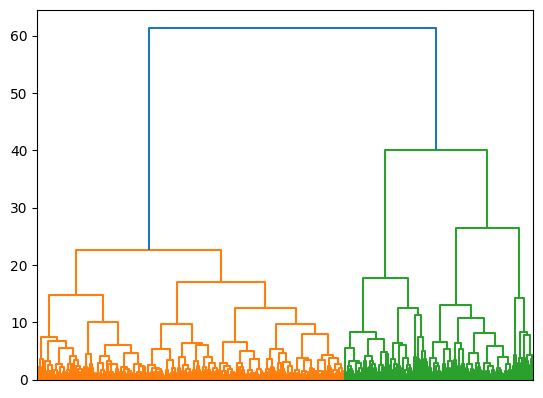

<Figure size 1800x1600 with 0 Axes>

In [23]:
#Step3: Dendogram to find the optimal number of cluster
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(cancer_df_standardized,method = "ward",metric = "euclidean"),no_labels = True)
plt.figure(figsize=(18, 16))
plt.title = ("Dendogram")
plt.xlabel = "Patients"
plt.ylabel = "euclidean distance"
plt.show()


In [24]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering()#default cluster is 2
hc.fit(cancer_df_standardized)

AgglomerativeClustering()

In [25]:
hc.n_clusters_

2

In [26]:
hc.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [27]:
pca_df["hc"] =  hc.labels_

pca_df

,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,hc
0,M,5.224155,3.204428,-2.171340,-0.169276,1.514252,0.113123,-0.344684,-0.231932,-0.021982,-0.011258,0
1,M,1.728094,-2.540839,-1.019679,0.547539,0.312330,-0.935634,0.420922,-0.008343,-0.056171,-0.022992,0
2,M,3.969757,-0.550075,-0.323569,0.397964,-0.322877,0.271493,0.076506,-0.355050,0.020116,-0.022675,0
3,M,3.596713,6.905070,0.792832,-0.604828,0.243176,-0.616970,-0.068051,-0.100163,-0.043481,-0.053456,0
4,M,3.151092,-1.358072,-1.862234,-0.185251,0.311342,0.090778,0.308087,0.099057,-0.026574,0.034113,0
...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,4.436781,-2.020670,-0.457737,-0.472738,-0.802882,0.553317,0.904138,-0.155407,0.022121,-0.005704,0
565,M,2.874757,-2.395235,1.169465,0.073879,-0.745189,-0.100192,0.355690,-0.158585,-0.037307,-0.017740,0
566,M,0.649583,-2.041783,1.710966,-0.271559,-0.101971,-0.040732,-0.188382,0.018907,-0.047129,0.000593,1
567,M,6.905664,1.216243,1.640120,0.153472,0.405966,0.468304,-0.309367,0.223487,0.004156,-0.018134,0


In [28]:
fig = px.scatter(pca_df, x="PC1", y="PC2", color="hc",
                 title="Hierachical Clustering")
fig.show()

#K-Means Clustering


In [29]:
 #K-means
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


In [30]:
 #Lets start with the initial data
#Step 1: Loading the data
cancer_data_url='https://drive.google.com/uc?export=download&id=12B0zuk8Vv6cttQ7tdRVecZQRiPzc1KiU'
cancer_df = pd.read_csv(cancer_data_url)
cancer_df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [31]:
#remove unwanted columns - removing id,diagnosis,  worst and se columns
cancer_df = cancer_df.iloc[:,2:12]
cancer_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [32]:
 # Step 2: Transform the data
#Standardize (scale, recenter)
scaler = skp.StandardScaler()
cancer_standardized = scaler.fit_transform(cancer_df)
cancer_df_standardized = pd.DataFrame(cancer_standardized)
cancer_df_standardized.columns = [cancer_df[:0]]
cancer_df_standardized.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450


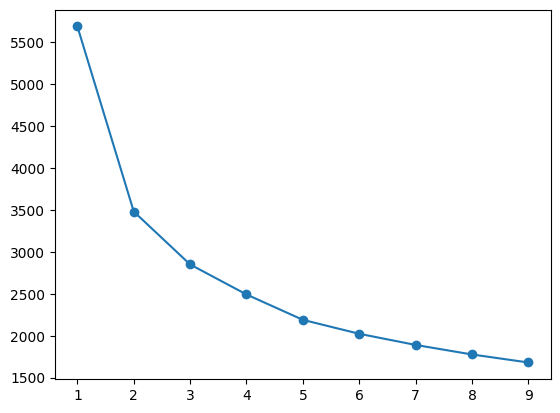

In [33]:
#By elbow method
def find_best_no_cluster(data,k_max):
  means=[]
  sse = []
  for k in range(1,k_max):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data)

    means.append(k)
    sse.append(kmeans.inertia_)

  #draw elbow graph
  plt.plot(means,sse,'o-')
  plt.xlabel = ("Number of Clusters")
  plt.ylabel = ("SSE")
  plt.title = ("Elbow Method")
  plt.show()


find_best_no_cluster(cancer_df_standardized,10)


In [34]:
#From the elbow method we get the optimal number of clusters = 2

In [35]:
#Step 4: Applying Kmeans clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(cancer_df_standardized)
cancer_df_standardized['cluster']  = kmeans.labels_
cancer_df_standardized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,cluster
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1
...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1


In [36]:
#We have now identified the clusters for the data

In [37]:
#Step 5: Plot the K-means clustering
#Now, to plot since we have more than two variables we use PCA components
#pca_df has the columns PC1,PC2 etc
#now adding the cluster columns also

pca_df["cluster"] =  kmeans.labels_

pca_df


,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,hc,cluster
0,M,5.224155,3.204428,-2.171340,-0.169276,1.514252,0.113123,-0.344684,-0.231932,-0.021982,-0.011258,0,1
1,M,1.728094,-2.540839,-1.019679,0.547539,0.312330,-0.935634,0.420922,-0.008343,-0.056171,-0.022992,0,1
2,M,3.969757,-0.550075,-0.323569,0.397964,-0.322877,0.271493,0.076506,-0.355050,0.020116,-0.022675,0,1
3,M,3.596713,6.905070,0.792832,-0.604828,0.243176,-0.616970,-0.068051,-0.100163,-0.043481,-0.053456,0,1
4,M,3.151092,-1.358072,-1.862234,-0.185251,0.311342,0.090778,0.308087,0.099057,-0.026574,0.034113,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,4.436781,-2.020670,-0.457737,-0.472738,-0.802882,0.553317,0.904138,-0.155407,0.022121,-0.005704,0,1
565,M,2.874757,-2.395235,1.169465,0.073879,-0.745189,-0.100192,0.355690,-0.158585,-0.037307,-0.017740,0,1
566,M,0.649583,-2.041783,1.710966,-0.271559,-0.101971,-0.040732,-0.188382,0.018907,-0.047129,0.000593,1,0
567,M,6.905664,1.216243,1.640120,0.153472,0.405966,0.468304,-0.309367,0.223487,0.004156,-0.018134,0,1


In [38]:
fig = px.scatter(pca_df, x="PC1", y="PC2", color="cluster",
                 title="KMeans Clustering")
fig.show()

In [39]:
#Just for fun - analyse and visualize how the data would be clustered if we selected different K value

In [40]:
#For that we do kmeans clustering with K = 1 to 10

for k in range(1,11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(cancer_df_standardized)

  pca_df[f"cluster_{k}"] = kmeans.labels_
pca_df

,diagnosis,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,M,5.224155,3.204428,-2.171340,-0.169276,1.514252,0.113123,-0.344684,-0.231932,-0.021982,...,0,0,2,3,4,3,5,6,6,3
1,M,1.728094,-2.540839,-1.019679,0.547539,0.312330,-0.935634,0.420922,-0.008343,-0.056171,...,0,0,1,0,3,1,3,5,8,6
2,M,3.969757,-0.550075,-0.323569,0.397964,-0.322877,0.271493,0.076506,-0.355050,0.020116,...,0,0,1,0,0,1,3,3,1,9
3,M,3.596713,6.905070,0.792832,-0.604828,0.243176,-0.616970,-0.068051,-0.100163,-0.043481,...,0,0,2,3,4,3,1,6,6,7
4,M,3.151092,-1.358072,-1.862234,-0.185251,0.311342,0.090778,0.308087,0.099057,-0.026574,...,0,0,1,0,3,1,3,5,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,4.436781,-2.020670,-0.457737,-0.472738,-0.802882,0.553317,0.904138,-0.155407,0.022121,...,0,0,1,0,0,1,3,3,8,9
565,M,2.874757,-2.395235,1.169465,0.073879,-0.745189,-0.100192,0.355690,-0.158585,-0.037307,...,0,0,1,0,3,1,3,5,8,6
566,M,0.649583,-2.041783,1.710966,-0.271559,-0.101971,-0.040732,-0.188382,0.018907,-0.047129,...,0,1,0,2,3,0,6,0,3,6
567,M,6.905664,1.216243,1.640120,0.153472,0.405966,0.468304,-0.309367,0.223487,0.004156,...,0,0,1,3,0,5,5,7,4,3


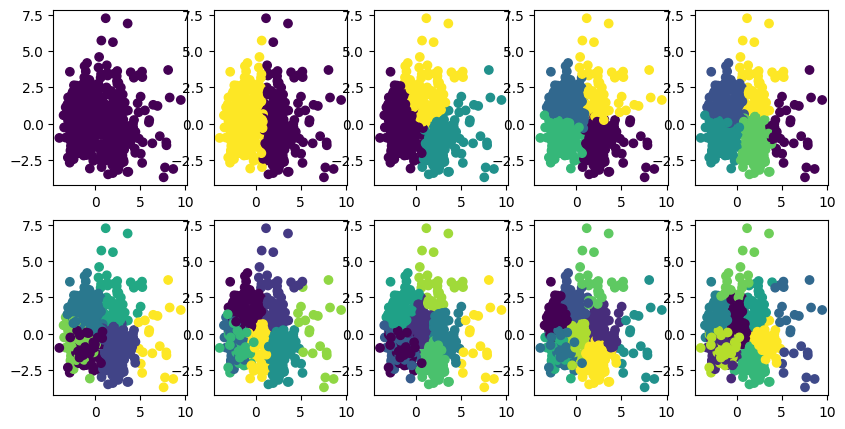

In [41]:
fig, axis = plt.subplots(nrows = 2,ncols =5,figsize = (10,5))
for i,axs in enumerate(fig.axes,start =1):
  axs.scatter( x=pca_df["PC1"], y=pca_df["PC2"], c=pca_df[f"cluster_{i}"])

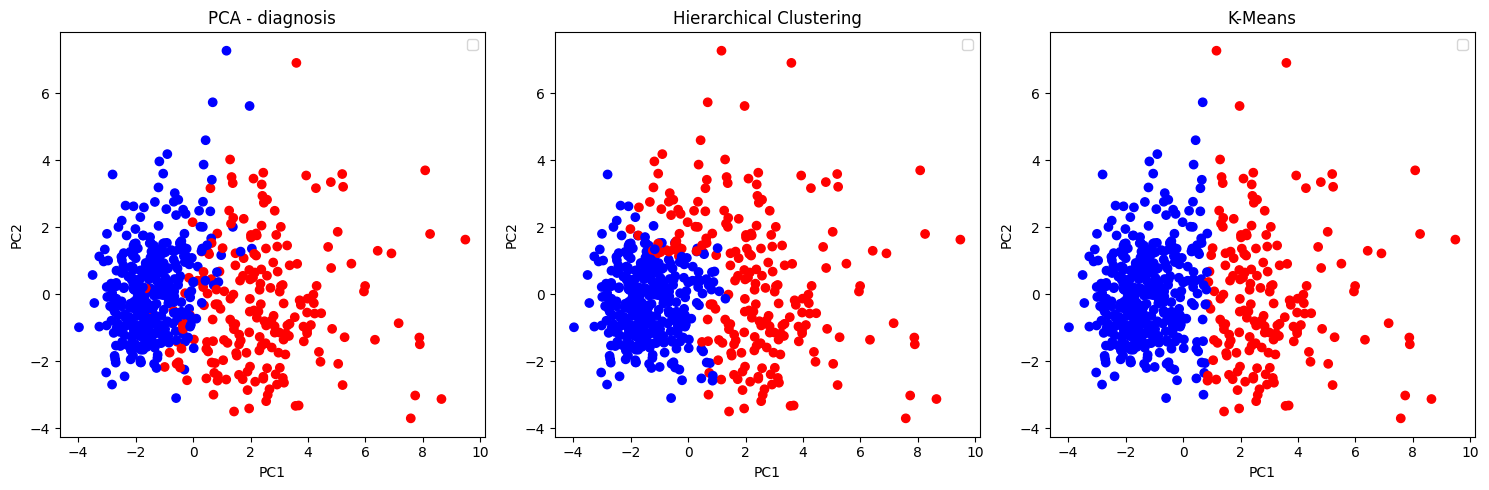

In [42]:
#Lets plot all plots side by side
fig, axis = plt.subplots(nrows = 1,ncols =3,figsize = (15,5))
color_map = {'M': 'red', 'B': 'blue'}
colors_diagnosis = [color_map[val] for val in pca_df["diagnosis"]]
axis[0].scatter( x=pca_df["PC1"], y=pca_df["PC2"], c=colors_diagnosis)
colors_hc = ['red' if val == 0 else 'blue' for val in pca_df["hc"]]
axis[1].scatter( x=pca_df["PC1"], y=pca_df["PC2"], c=colors_hc)
colors_cluster_2 = ['red' if val == 0 else 'blue' for val in pca_df["cluster_2"]]
axis[2].scatter( x=pca_df["PC1"], y=pca_df["PC2"], c=colors_cluster_2)

# Set titles and legends for the subplots
titles = ["PCA - diagnosis", "Hierarchical Clustering", "K-Means"]
for i, ax in enumerate(axis):
    ax.set_title(titles[i])
    ax.legend()
    ax.set_xlabel('PC1')  # Set x label for the first subplot
    ax.set_ylabel('PC2')  # Set y label for the first subplot

fig.tight_layout()
fig.show()
